In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import models, optimizers
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from datetime import datetime as dt
from sklearn.model_selection import KFold
import import_ipynb
from Model_dev import compress_to_2d, get_model, LSTM_model, Attention, C_LSTM, data_handling, model_development, rmse
import copy

importing Jupyter notebook from Model_dev.ipynb


In [2]:
country = 'India'
datadir = os.path.join(os.getcwd(), "Data")
modeldir = os.path.join(os.getcwd(), "Models")
logdir = os.path.join(os.getcwd(), "Log")
filename = "Full_{}.csv".format(country)
filepath = os.path.join(datadir, filename)
social_media = ['like_index','retweet_index']
covid_cases = ['ConfirmedCases', 'ConfirmedDeaths', 'Daily_cases']
general_info = ['CountryCode_x', 'CountryName_x', 'Jurisdiction', 'Date']
num_variable = ['E3_Fiscal measures', 'E4_International support', 'H5_Investment in vaccines', 'H4_Emergency investment in healthcare']
required_days = 14
pred_days = 7

In [3]:
if not os.path.isdir(modeldir):
    os.mkdir(modeldir)
if not os.path.isdir(logdir):
    os.mkdir(logdir)
if not os.path.isdir(datadir):
    os.mkdir(datadir)

##### Reshape and MinMaxScale input #####
(536, 14, 24) (536, 7, 1) (60, 14, 24) (60, 7, 1)
##### Model Development #####
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                7296      
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 231       
_________________________________________________________________
reshape (Reshape)            (None, 7, 1)              0         
Total params: 8,583
Trainable params: 8,583
Non-trainable params: 0
_________________________________________________________________
Model: "model"
__________________________________________________________________________________________________
Layer (type)    

INFO:tensorflow:Assets written to: C:\Users\wasin\Downloads\Work\PG(HKU)\FYP\Program_Data\Models\20211024 01-01Attention\assets


INFO:tensorflow:Assets written to: C:\Users\wasin\Downloads\Work\PG(HKU)\FYP\Program_Data\Models\20211024 01-01Attention\assets


INFO:tensorflow:Assets written to: C:\Users\wasin\Downloads\Work\PG(HKU)\FYP\Program_Data\Models\20211024 01-01C-LSTM\assets


INFO:tensorflow:Assets written to: C:\Users\wasin\Downloads\Work\PG(HKU)\FYP\Program_Data\Models\20211024 01-01C-LSTM\assets


##### Log completed #####


<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

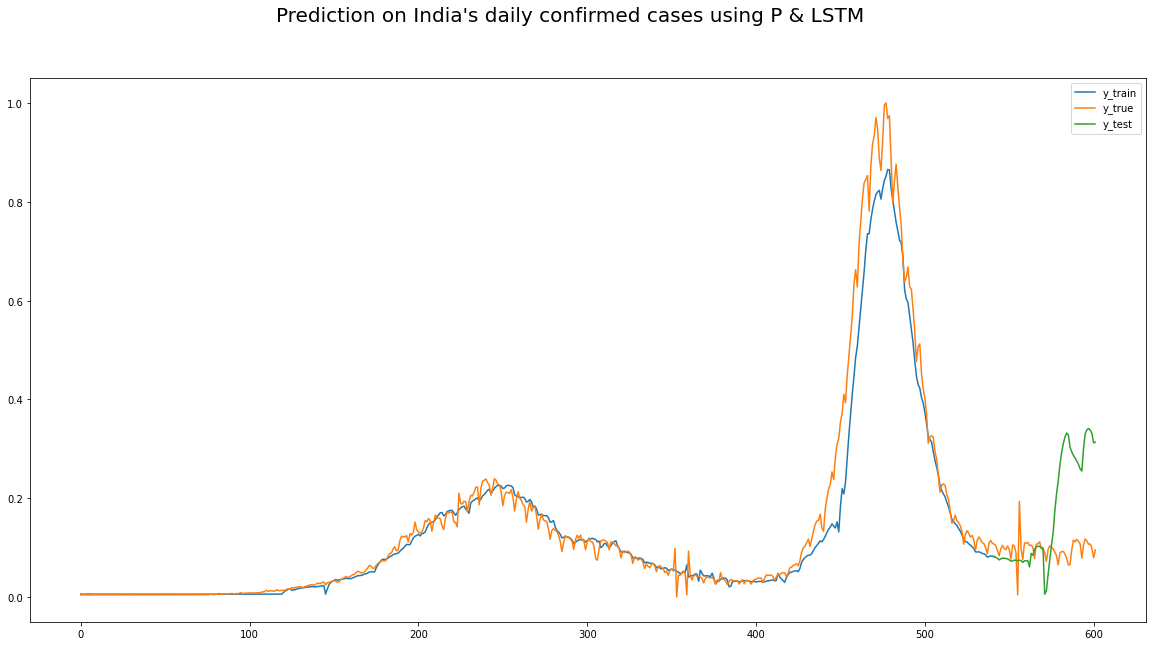

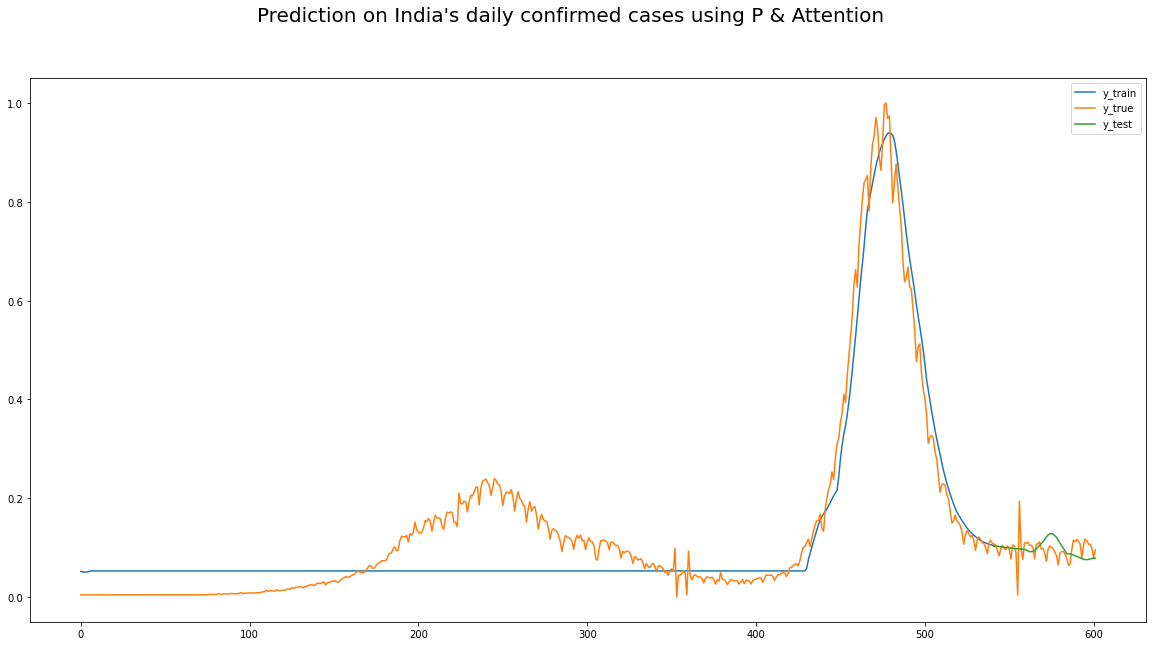

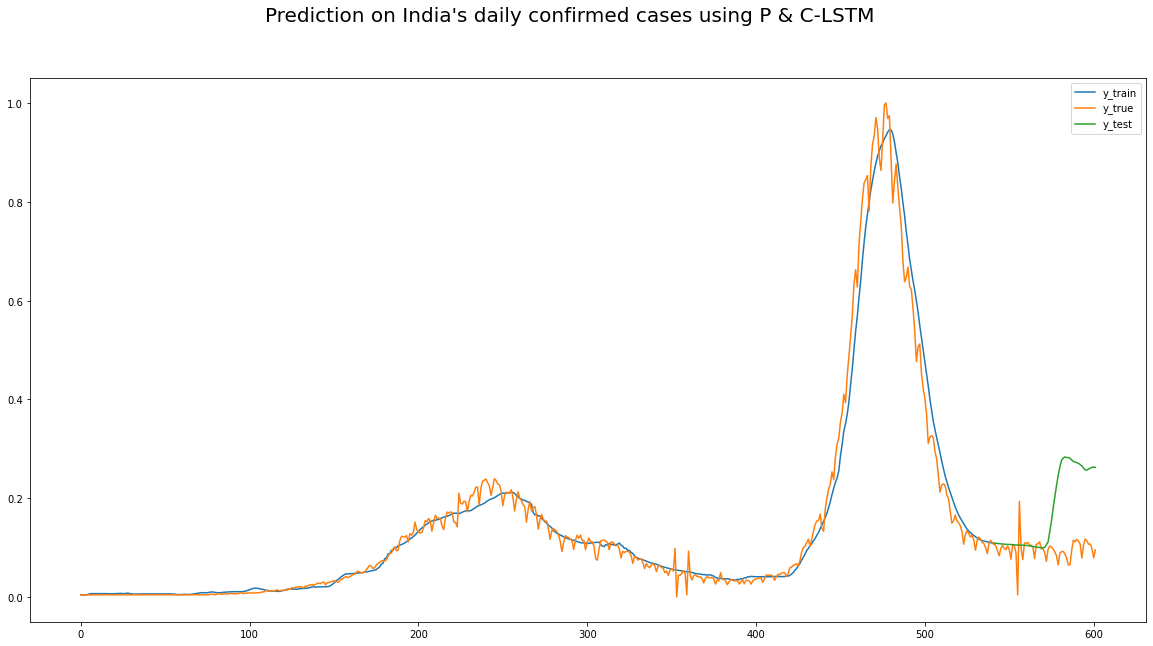

In [4]:
df = pd.read_csv(filepath, index_col=0)
df.set_index('Date', inplace=True)

policy = []
columns = df.columns
for column in columns:
    if not any(column in _list for _list in [social_media, general_info, covid_cases]):
        policy.append(column)
categorical_variable = list(set(policy) - set(num_variable))
df[categorical_variable] = df[categorical_variable].astype("category")

features = policy
x_train, x_test, y_train, y_test = data_handling(df, features, required_days, pred_days)
model_development(x_train, x_test, y_train, y_test, "P", country, modeldir, logdir, required_days, pred_days)

##### Reshape and MinMaxScale input #####
(536, 14, 26) (536, 7, 1) (60, 14, 26) (60, 7, 1)
##### Model Development #####
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 32)                7552      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 231       
_________________________________________________________________
reshape_3 (Reshape)          (None, 7, 1)              0         
Total params: 8,839
Trainable params: 8,839
Non-trainable params: 0
_________________________________________________________________
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)

INFO:tensorflow:Assets written to: C:\Users\wasin\Downloads\Work\PG(HKU)\FYP\Program_Data\Models\20211024 01-15LSTM\assets


INFO:tensorflow:Assets written to: C:\Users\wasin\Downloads\Work\PG(HKU)\FYP\Program_Data\Models\20211024 01-15Attention\assets


INFO:tensorflow:Assets written to: C:\Users\wasin\Downloads\Work\PG(HKU)\FYP\Program_Data\Models\20211024 01-15Attention\assets


INFO:tensorflow:Assets written to: C:\Users\wasin\Downloads\Work\PG(HKU)\FYP\Program_Data\Models\20211024 01-15C-LSTM\assets


INFO:tensorflow:Assets written to: C:\Users\wasin\Downloads\Work\PG(HKU)\FYP\Program_Data\Models\20211024 01-15C-LSTM\assets


##### Log completed #####


<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

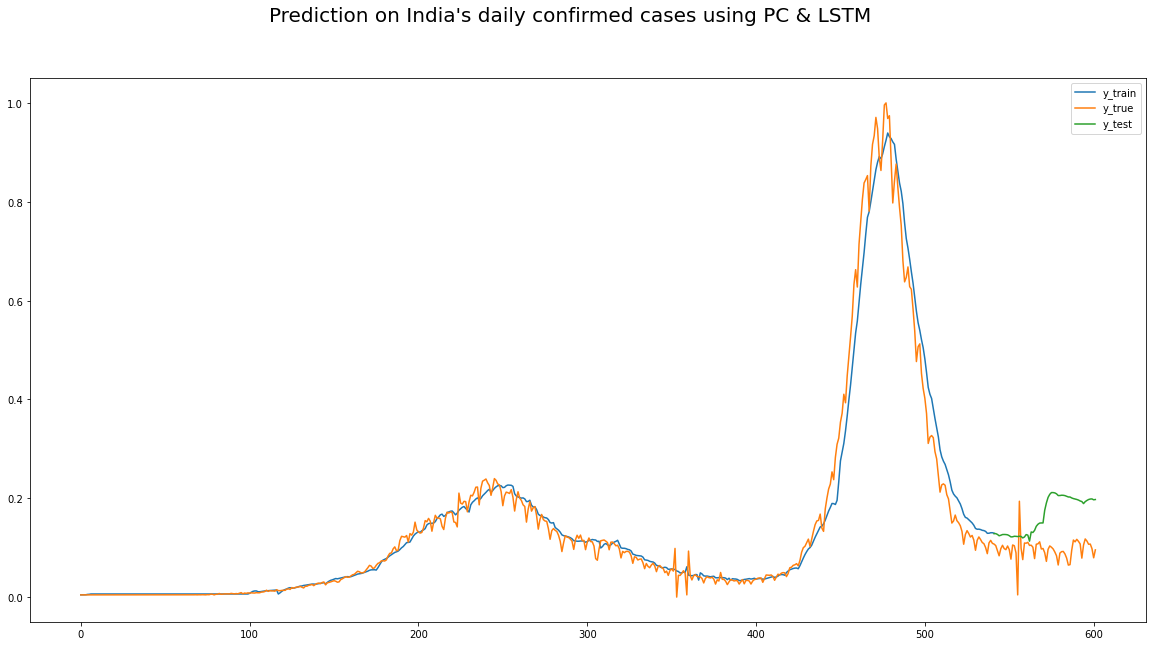

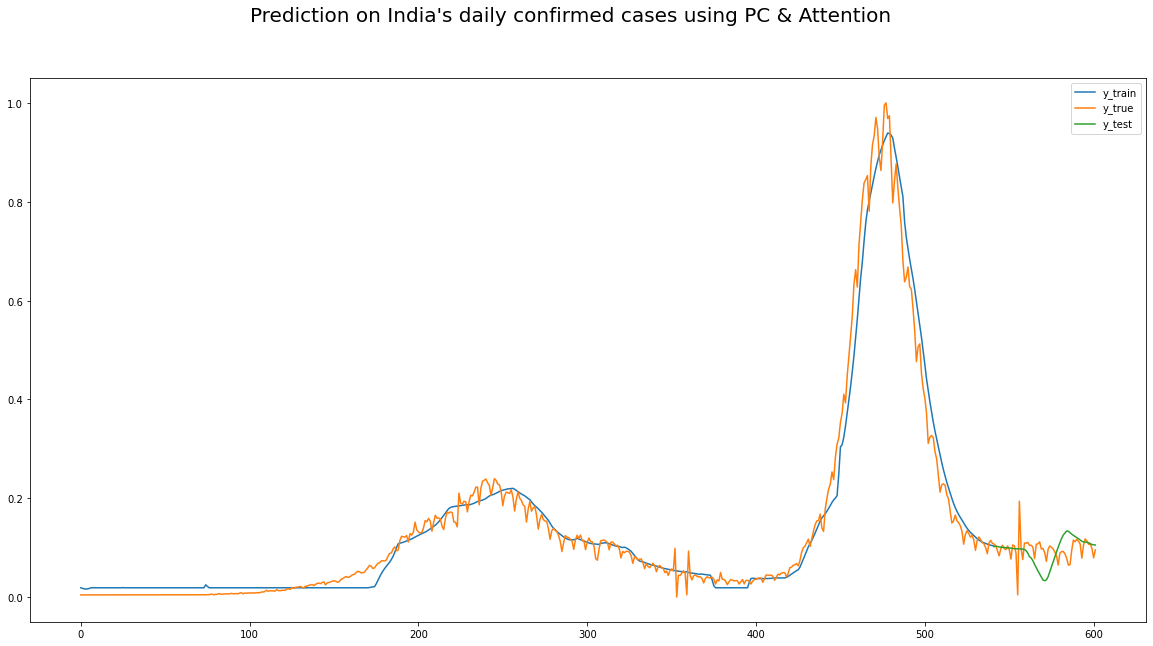

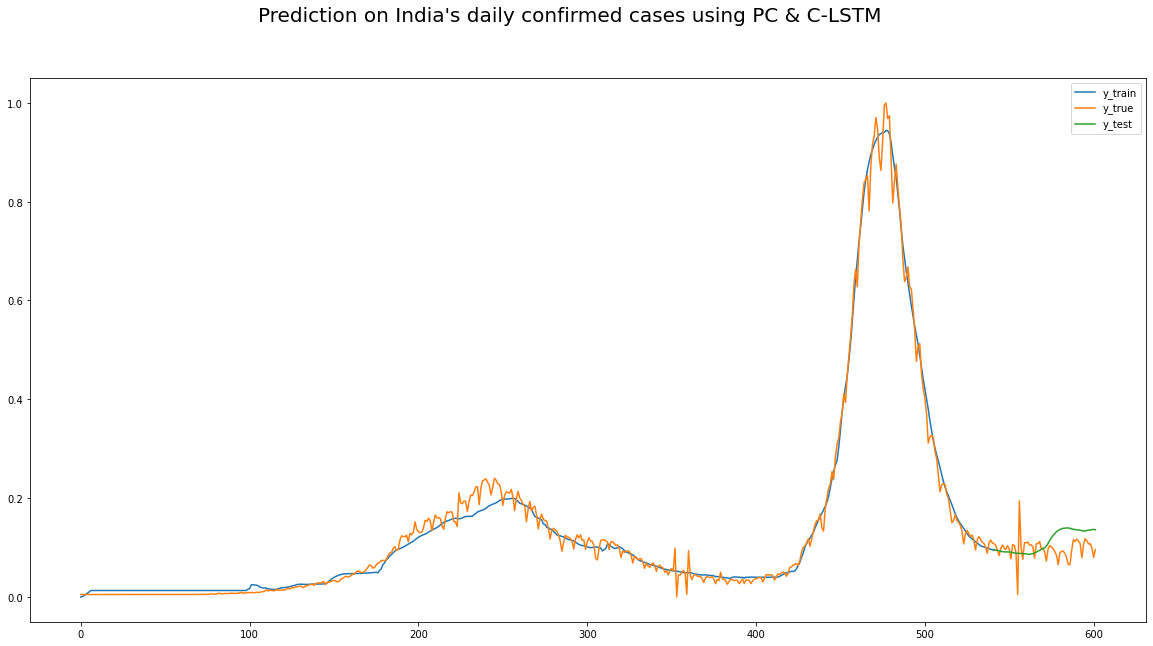

In [5]:
features = policy + covid_cases
x_train, x_test, y_train, y_test = data_handling(df, features, required_days, pred_days)
model_development(x_train, x_test, y_train, y_test, "PC", country, modeldir, logdir, required_days, pred_days)

##### Reshape and MinMaxScale input #####
(536, 14, 28) (536, 7, 1) (60, 14, 28) (60, 7, 1)
##### Model Development #####
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 32)                7808      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_13 (Dense)             (None, 7)                 231       
_________________________________________________________________
reshape_6 (Reshape)          (None, 7, 1)              0         
Total params: 9,095
Trainable params: 9,095
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)

INFO:tensorflow:Assets written to: C:\Users\wasin\Downloads\Work\PG(HKU)\FYP\Program_Data\Models\20211024 01-29LSTM\assets


INFO:tensorflow:Assets written to: C:\Users\wasin\Downloads\Work\PG(HKU)\FYP\Program_Data\Models\20211024 01-29Attention\assets


INFO:tensorflow:Assets written to: C:\Users\wasin\Downloads\Work\PG(HKU)\FYP\Program_Data\Models\20211024 01-29Attention\assets


INFO:tensorflow:Assets written to: C:\Users\wasin\Downloads\Work\PG(HKU)\FYP\Program_Data\Models\20211024 01-29C-LSTM\assets


INFO:tensorflow:Assets written to: C:\Users\wasin\Downloads\Work\PG(HKU)\FYP\Program_Data\Models\20211024 01-29C-LSTM\assets


##### Log completed #####


<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

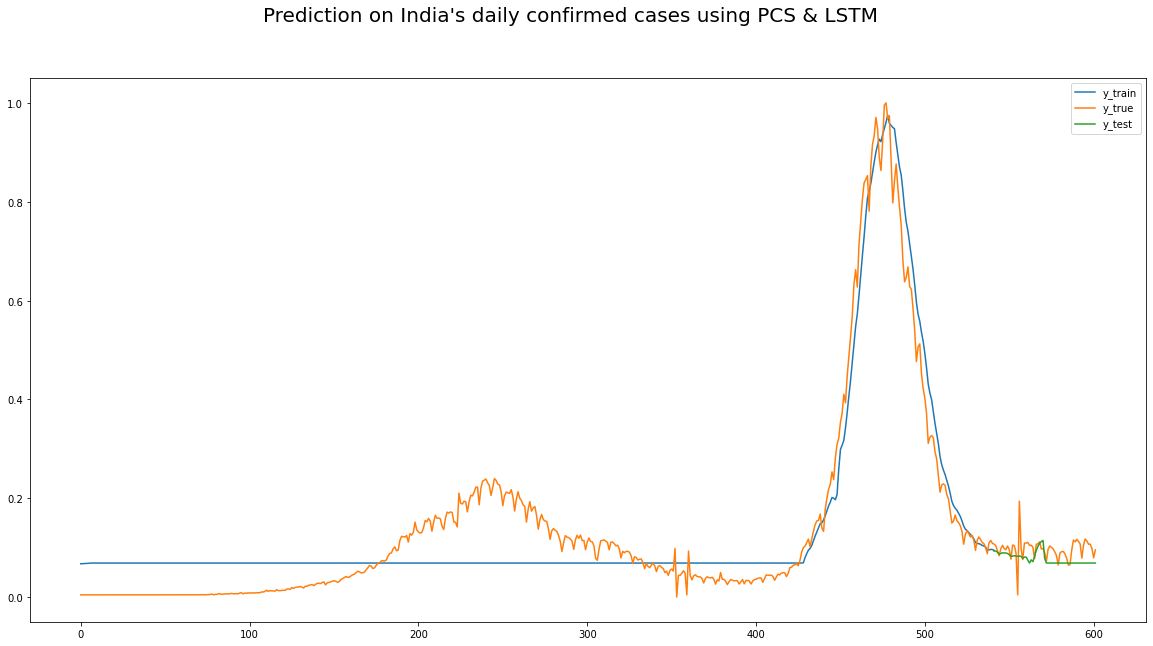

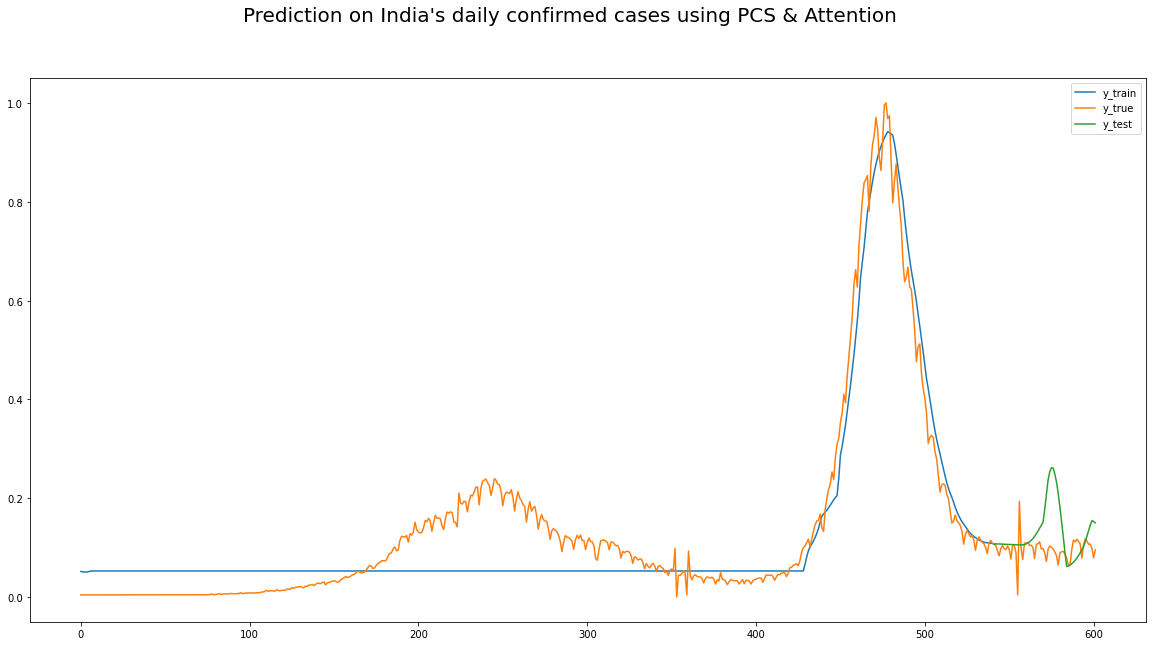

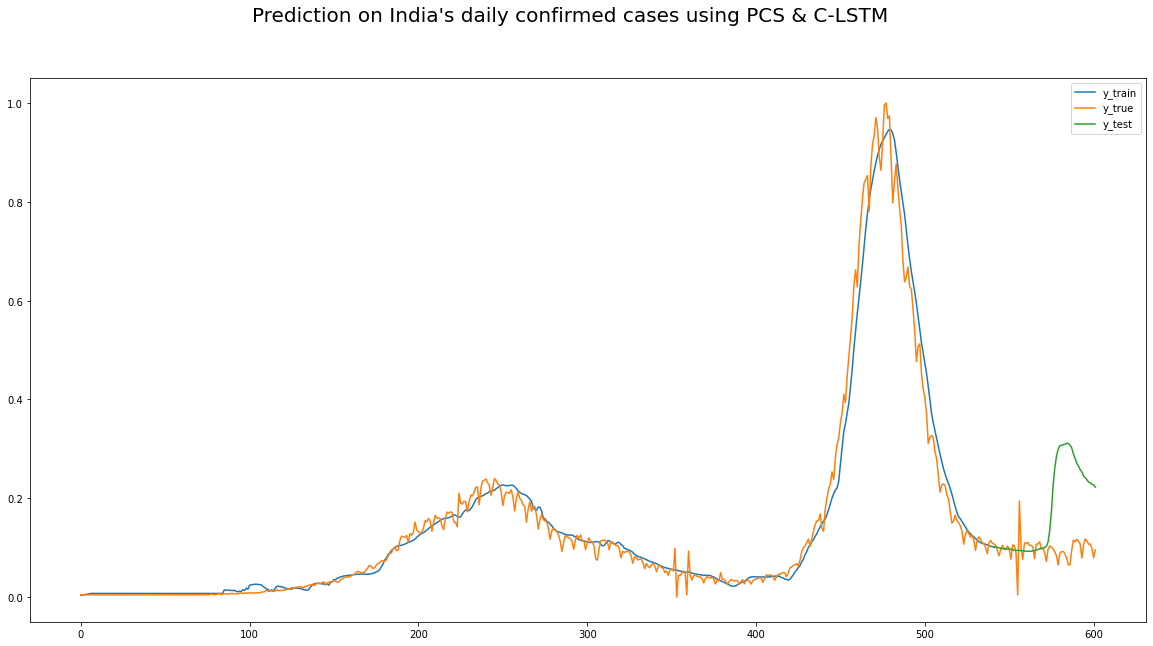

In [6]:
features = policy + covid_cases + social_media
x_train, x_test, y_train, y_test = data_handling(df, features, required_days, pred_days)
model_development(x_train, x_test, y_train, y_test, "PCS", country, modeldir, logdir, required_days, pred_days)

### Best model for the country
log_file = os.path.join(logdir,"Models.csv")
best_result = get_model(log_file, country)

features_used = best_result['Features'].values[0]
algo = best_result['Algorithm'].values[0]
best_model_filepath = best_result['Model_path'].values[0]
best_model = models.load_model(best_model_filepath)
config = best_model.get_config()

if features_used == "P":
    features = policy
elif features_used == "PC":
    features = policy + covid_cases
else:
    features = policy + covid_cases + social_media

x_train, x_test, y_train, y_test = data_handling(df, features, required_days, pred_days)
y_pred_train = compress_to_2d(best_model.predict(x_train))
y_pred_test = compress_to_2d(best_model.predict(x_test))
y_true_train = compress_to_2d(y_train)
y_true_test = compress_to_2d(y_test)

mse = tf.keras.losses.MeanSquaredError()
loss = mse(y_true_train, y_pred_train).numpy()
val_loss = mse(y_true_test, y_pred_test).numpy()

### Best model for the country
log_file = os.path.join(logdir,"Models.csv")
best_result = get_model(log_file, country)

features_used = best_result['Features'].values[0]
algo = best_result['Algorithm'].values[0]
best_model_filepath = best_result['Model_path'].values[0]
best_model = models.load_model(best_model_filepath)
config = best_model.get_config()

if features_used == "P":
    features = policy
elif features_used == "PC":
    features = policy + covid_cases
else:
    features = policy + covid_cases + social_media

x_train, x_test, y_train, y_test = data_handling(df, features, required_days, pred_days)
y_pred_train = compress_to_2d(best_model.predict(x_train))
y_pred_test = compress_to_2d(best_model.predict(x_test))
y_true_train = compress_to_2d(y_train)
y_true_test = compress_to_2d(y_test)

mse = tf.keras.losses.MeanSquaredError()
loss = mse(y_true_train, y_pred_train).numpy()
val_loss = mse(y_true_test, y_pred_test).numpy()

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=50, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=40, factor=0.6, min=0.00001)
opt = optimizers.Adam(learning_rate=0.01)

### Feature importance for the country
result2 = {}

for i in range(len(policy)):
    
    target = policy[i]
    x_train, x_test, y_train, y_test = data_handling(df, features, required_days, pred_days, swap_col=target)
        
    if algo == 'Attention':
        model = keras.Model.from_config(config)
    else:
        model = keras.Sequential.from_config(config)

    model.compile(optimizer=opt, loss=rmse)
    model.summary()
    
    kf = KFold()
    for train_index, test_index in kf.split(x_train):
        xx_train, xx_test = x_train[train_index], x_train[test_index]
        yy_train, yy_test = y_train[train_index], y_train[test_index]
        
        history = model.fit(xx_train, yy_train, shuffle=True,
                 validation_data=(xx_test, yy_test),
                 epochs=1000,
                 callbacks=[early_stopping, reduce_lr],
                 verbose=0)
    
    exp_train = compress_to_2d(model.predict(x_train))
    exp_test = compress_to_2d(model.predict(x_test))

    _loss = mse(y_true_train, exp_train).numpy()
    _val_loss = mse(y_true_test, exp_test).numpy()
    
    print("######", target, "#####")
    print("Changes in loss: {}".format(_loss-loss))
    print("Changes in Validation loss: {}".format(_val_loss-val_loss))
    
    result2[target] = [loss, val_loss, _loss, _val_loss, _loss-loss, _val_loss-val_loss, _loss/loss, _val_loss/val_loss]

Changes = pd.DataFrame.from_dict(result2, orient='index', columns=['Old loss', 'Old Validation loss', 'New Loss', 'New Validation Loss', 'Changes in loss', 
                                                                 'Changes in validation loss', 'Ratio of new-old loss', 'Ratio of new-old validation loss'])
Changes.to_csv(os.path.join(logdir, "{}_feat_importance.csv".format(country)))

### Feature importance for the country each month
months = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'August', 'Sept']

for i in range(len(months)):

    tmp = df[pd.to_datetime(df.index) < dt(2021, i+2, 1)]
    print(tmp.tail())
    
    x_train, x_test, y_train, y_test = data_handling(tmp, features, required_days, pred_days, test_size=30)
    y_pred_train = compress_to_2d(best_model.predict(x_train))
    y_pred_test = compress_to_2d(best_model.predict(x_test))
    y_true_train = compress_to_2d(y_train)
    y_true_test = compress_to_2d(y_test)

    mse = tf.keras.losses.MeanSquaredError()
    loss = mse(y_true_train, y_pred_train).numpy()
    val_loss = mse(y_true_test, y_pred_test).numpy()
    
    result3 = {}
    
    print("######", months[i], "#####")

    for j in range(len(policy)):
        
        target = policy[j]
        x_train, x_test, y_train, y_test = data_handling(tmp, features, required_days, pred_days, swap_col=target, test_size=30)
        
        if algo == 'Attention':
            model = keras.Model.from_config(config)
        else:
            model = keras.Sequential.from_config(config)
        
        model.compile(optimizer=opt, loss=rmse)
        model.summary()

        kf = KFold()
        for train_index, test_index in kf.split(x_train):
            xx_train, xx_test = x_train[train_index], x_train[test_index]
            yy_train, yy_test = y_train[train_index], y_train[test_index]

            history = model.fit(xx_train, yy_train, shuffle=True,
                     validation_data=(xx_test, yy_test),
                     epochs=1000,
                     callbacks=[early_stopping, reduce_lr],
                     verbose=0)
    

        exp_train = compress_to_2d(model.predict(x_train))
        exp_test = compress_to_2d(model.predict(x_test))

        _loss = mse(y_true_train, exp_train).numpy()
        _val_loss = mse(y_true_test, exp_test).numpy()

        print("######", target, "#####")
        print("Changes in loss: {}".format(_loss-loss))
        print("Changes in Validation loss: {}".format(_val_loss-val_loss))

        result3[target] = [loss, val_loss, _loss, _val_loss, _loss-loss, _val_loss-val_loss, _loss/loss, _val_loss/val_loss]

    Changes = pd.DataFrame.from_dict(result3, orient='index', columns=['Old loss', 'Old Validation loss', 'New Loss', 'New Validation Loss', 'Changes in loss', 
                                                                 'Changes in validation loss', 'Ratio of new-old loss', 'Ratio of new-old validation loss'])
    Changes.to_csv(os.path.join(logdir, "{}_feat_importance_{}.csv".format(country, months[i])))

In [7]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=50, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=40, factor=0.6, min=0.00001)
opt = optimizers.Adam(learning_rate=0.01)

In [8]:
### Feature importance for the country
result2 = {}

for i in range(len(policy)):
    
    target = policy[i]
    x_train, x_test, y_train, y_test = data_handling(df, features, required_days, pred_days, swap_col=target)
        
    if algo == 'Attention':
        model = keras.Model.from_config(config)
    else:
        model = keras.Sequential.from_config(config)

    model.compile(optimizer=opt, loss='mean_squared_error')
    model.summary()
    
    kf = KFold()
    for train_index, test_index in kf.split(x_train):
        xx_train, xx_test = x_train[train_index], x_train[test_index]
        yy_train, yy_test = y_train[train_index], y_train[test_index]
        
        history = model.fit(xx_train, yy_train, shuffle=True,
                 validation_data=(xx_test, yy_test),
                 epochs=1000,
                 callbacks=[early_stopping, reduce_lr],
                 verbose=0)
    
    exp_train = compress_to_2d(model.predict(x_train))
    exp_test = compress_to_2d(model.predict(x_test))

    _loss = mse(y_true_train, exp_train).numpy()
    _val_loss = mse(y_true_test, exp_test).numpy()
    
    print("######", target, "#####")
    print("Changes in loss: {}".format(_loss-loss))
    print("Changes in Validation loss: {}".format(_val_loss-val_loss))
    
    result2[target] = [loss, val_loss, _loss, _val_loss, _loss-loss, _val_loss-val_loss, _loss/loss, _val_loss/val_loss]

Changes = pd.DataFrame.from_dict(result2, orient='index', columns=['Old loss', 'Old Validation loss', 'New Loss', 'New Validation Loss', 'Changes in loss', 
                                                                 'Changes in validation loss', 'Ratio of new-old loss', 'Ratio of new-old validation loss'])
Changes.to_csv(os.path.join(logdir, "{}_feat_importance.csv".format(country)))

##### Reshape and MinMaxScale input #####
(536, 14, 28) (536, 7, 1) (60, 14, 28) (60, 7, 1)


C:\Users\wasin\Tensorflow\venv\lib\site-packages\pandas\core\indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


NameError: name 'algo' is not defined

In [ ]:
### Feature importance for the country each month
months = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'August', 'Sept']

for i in range(len(months)):

    tmp = df[pd.to_datetime(df.index, dayfirst=True) < dt(2021, i+2, 1)]
    
    x_train, x_test, y_train, y_test = data_handling(tmp, features, required_days, pred_days, test_size=30)
    y_pred_train = compress_to_2d(best_model.predict(x_train))
    y_pred_test = compress_to_2d(best_model.predict(x_test))
    y_true_train = compress_to_2d(y_train)
    y_true_test = compress_to_2d(y_test)

    mse = tf.keras.losses.MeanSquaredError()
    loss = mse(y_true_train, y_pred_train).numpy()
    val_loss = mse(y_true_test, y_pred_test).numpy()
    
    result3 = {}
    
    print("######", months[i], "#####")

    for j in range(len(policy)):
        
        target = policy[j]
        x_train, x_test, y_train, y_test = data_handling(tmp, features, required_days, pred_days, swap_col=target, test_size=30)
        
        if algo == 'Attention':
            model = keras.Model.from_config(config)
        else:
            model = keras.Sequential.from_config(config)

        model.summary()

        kf = KFold()
        for train_index, test_index in kf.split(x_train):
            xx_train, xx_test = x_train[train_index], x_train[test_index]
            yy_train, yy_test = y_train[train_index], y_train[test_index]

            history = model.fit(xx_train, yy_train, shuffle=True,
                     validation_data=(xx_test, yy_test),
                     epochs=1000,
                     callbacks=[early_stopping, reduce_lr],
                     verbose=0)
    

        exp_train = compress_to_2d(model.predict(x_train))
        exp_test = compress_to_2d(model.predict(x_test))

        _loss = mse(y_true_train, exp_train).numpy()
        _val_loss = mse(y_true_test, exp_test).numpy()

        print("######", target, "#####")
        print("Changes in loss: {}".format(_loss-loss))
        print("Changes in Validation loss: {}".format(_val_loss-val_loss))

        result3[target] = [loss, val_loss, _loss, _val_loss, _loss-loss, _val_loss-val_loss, _loss/loss, _val_loss/val_loss]

    Changes = pd.DataFrame.from_dict(result3, orient='index', columns=['Old loss', 'Old Validation loss', 'New Loss', 'New Validation Loss', 'Changes in loss', 
                                                                 'Changes in validation loss', 'Ratio of new-old loss', 'Ratio of new-old validation loss'])
    Changes.to_csv(os.path.join(logdir, "{}_feat_importance_{}.csv".format(country, months[i])))